ElasticNet Regression from scratch

In [1]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [2]:
y_actual=np.array([10,12,22,12,20,21,23,26,34,49])
X=np.array([3,4,6,4,5,12,8,7,9,10])

In [22]:
def ElasticNetRegression(x,y_actual):
    m,c=0,0
    num,deno=0,0
    l1=0.1
    l2=0.1
    x_mean=statistics.mean(x)
    y_mean=statistics.mean(y_actual)
    num=(sum(x*y_actual)-y_mean*sum(x))-l1
    deno=sum(x**2)-x_mean*sum(x)+l2
    m=num/deno 
    c=(y_mean-m*x_mean)
    return m,c  

In [23]:
m,c=ElasticNetRegression(X,y_actual)
print(m,c)

2.088569265707797 9.468584405753216


0.45270907300313834


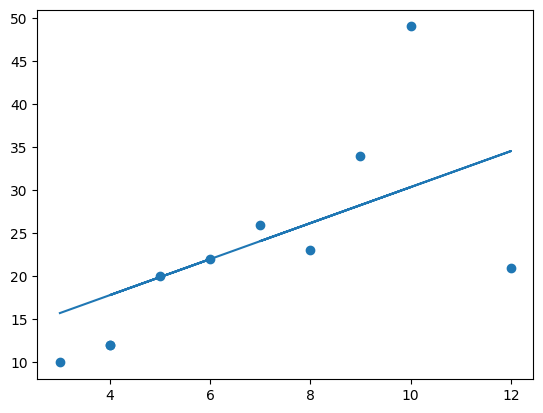

In [24]:
y_pred=X*m+c
rss=sum((y_pred-y_actual)**2)
tss=sum((y_actual-statistics.mean(y_actual))**2)
r2=1-(rss/tss)
print(r2)
plt.plot(X,y_pred)
plt.scatter(X,y_actual)
plt.show()

ElasticNet Regression using Sklearn

In [25]:
from sklearn.linear_model import Lasso
y_actual=np.array([10,12,22,12,20,21,23,26,34,49])
x=np.array([3,4,6,4,5,12,8,7,9,10])

In [26]:
x_modi=x.reshape(-1, 1)
regr = Lasso()
regr.fit(x_modi, y_actual)
inter=regr.intercept_
slope=regr.coef_

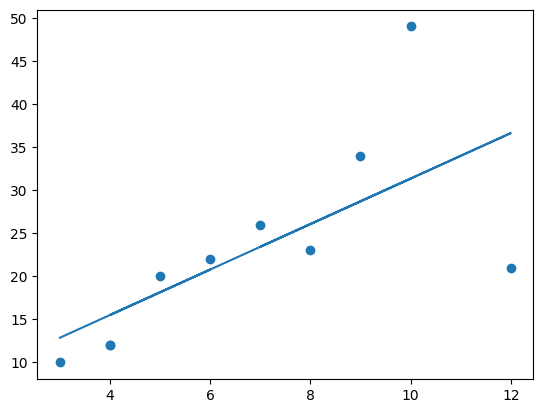

48.538062787582284 [2.63917526] 4.953608247422675


In [27]:
rss,tss=0,0
y_pred=(slope*x+inter)
plt.figure()
plt.scatter(x,y_actual)
plt.plot(x,y_pred)
plt.show()
rss=sum((y_pred-y_actual)**2)
tss=sum((y_actual-statistics.mean(y_actual))**2)
r2=1-(rss/tss)
print(r2*100,slope,inter)